In [1]:
# a Importing Necessary packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random

In [2]:
# b Load the training and testing data (MNIST)
mnist = tf.keras.datasets.mnist

In [3]:
# splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalising or scalling data
x_train = x_train / 255
x_test = x_test / 255


In [6]:
# c Define the network architecture using keras

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# d train the model using SGD

model.compile(optimizer = 'sgd',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7275 - loss: 1.0422 - val_accuracy: 0.9030 - val_loss: 0.3578
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9022 - loss: 0.3520 - val_accuracy: 0.9184 - val_loss: 0.2927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9155 - loss: 0.2995 - val_accuracy: 0.9278 - val_loss: 0.2607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2636 - val_accuracy: 0.9345 - val_loss: 0.2398
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9342 - loss: 0.2374 - val_accuracy: 0.9406 - val_loss: 0.2202
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9398 - loss: 0.2226 - val_accuracy: 0.9414 - val_loss: 0.2048
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9439 - loss: 0.2069 - val_accuracy: 0.9455 - val_loss: 0.1920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9439 - loss: 0.2013 -

In [8]:
# e Evaluuate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.1895
loss=0.164
Accuracy=0.951


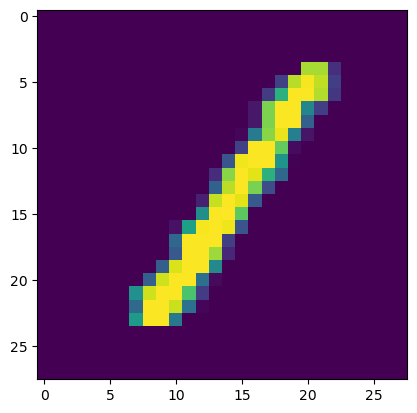

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


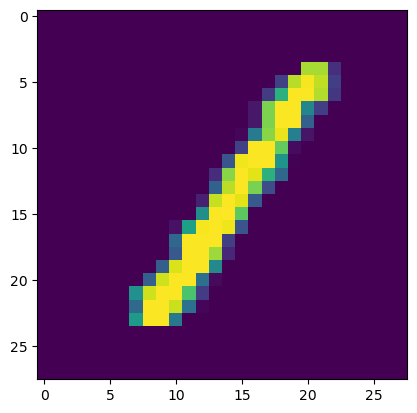

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [11]:
print('predicted value: ', predicted_value[n])

predicted value:  [3.05809590e-06 9.96023059e-01 2.16967426e-03 2.68204923e-04
 6.19706334e-05 1.40759701e-04 1.15631294e-04 5.10229554e-04
 6.87593070e-04 1.97798636e-05]


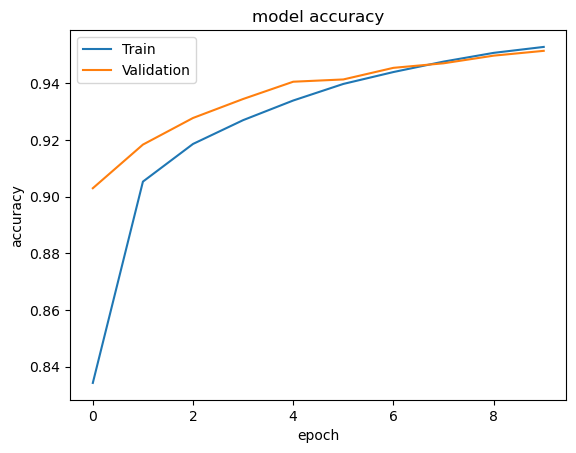

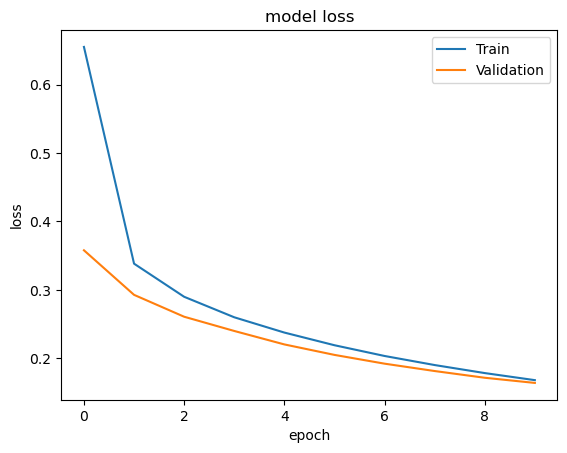

In [12]:
# f plot the training loss and accuracy

# plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()